In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import shap
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score 
from xgboost import plot_importance
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
def performance_metrics(Y_test, Y_pred):
    print('\nPerformance Metrics')
    print('Accuracy: ', accuracy_score(Y_test, Y_pred))
    print('Precision: ', precision_score(Y_test,Y_pred))
    print('Recall: ', recall_score(Y_test,Y_pred))
    print('F1: ', f1_score(Y_test,Y_pred))
    
    print(" ")
    print(classification_report(Y_test, Y_pred)) 
    confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)  
    cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1])
  
    cm_display.plot()
    plt.show()
!pip install shap


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Reading Data

In [2]:
data = pd.read_csv('starcraft_player_data.csv')
data.shape

(3395, 20)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

## Cleaning Data

#### There were few columns which had a string data type inspite of being quantitative. On further analysis, it was found that a few of the rows had the value "?". These values can be dropped or imputed. They have been dropped in this workflow

In [4]:
data[data['HoursPerWeek'] == '?'].shape

(56, 20)

## Missing Value Imputation

In [5]:
string_columns =  data.select_dtypes(include='object').keys()
check = data
for i in string_columns :
    lr = LinearRegression()
    testdf = check[check[i] == '?']
    traindf = check[check[i] != '?']
    y = traindf[i]
    lr.fit(traindf.drop(['Age', 'HoursPerWeek', 'TotalHours'], axis = 1),y)
    pred = lr.predict(testdf.drop(['Age', 'HoursPerWeek', 'TotalHours'], axis = 1))
    testdf[i]= pred
    check = pd.concat([traindf,testdf], axis = 0)
    check.reset_index(drop=True, inplace=True)
final_data = check
for i in string_columns:
    final_data[i] = pd.to_numeric(final_data[i]) 
final_data.drop('GameID', inplace=True, axis =1)
final_data.shape

#string_columns =  data.select_dtypes(include='object').keys()
#final_data = data
#for i in string_columns:
#    final_data = final_data[final_data[i] != '?']
#for i in string_columns:
#    final_data[i] = pd.to_numeric(final_data[i]) 
#final_data.drop('GameID', inplace=True, axis =1)
#final_data.shape

(3395, 19)

In [6]:
final_data.LeagueIndex.value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

In [30]:
final_data.LeagueIndex.mean()

4.089246294544308

## EDA

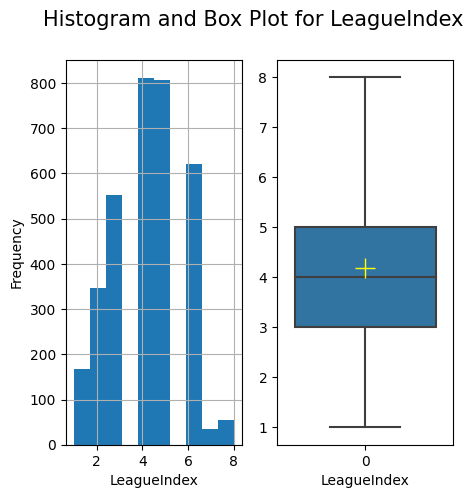

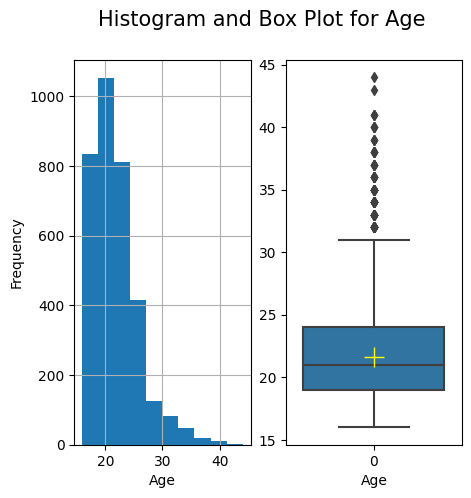

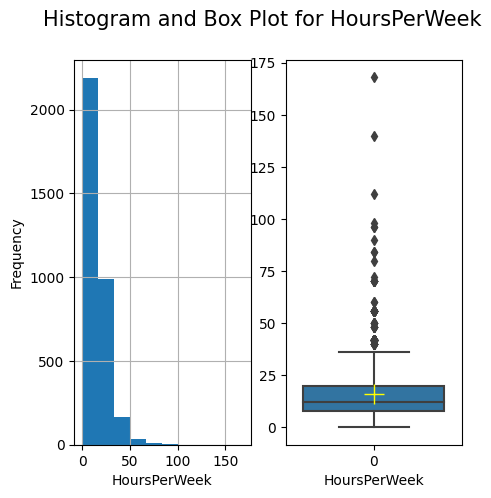

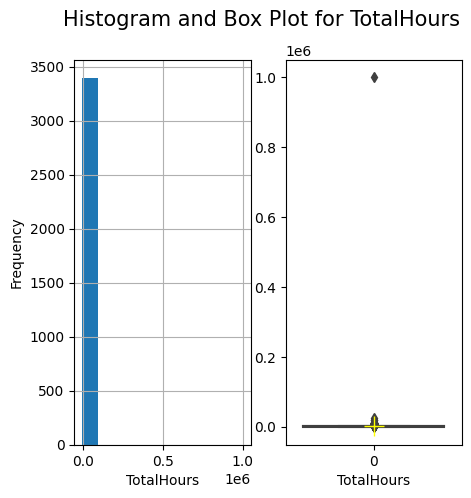

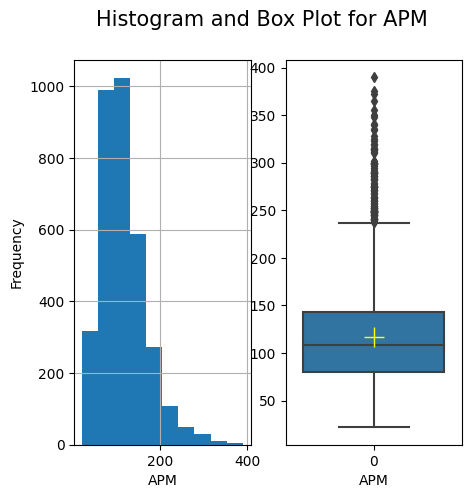

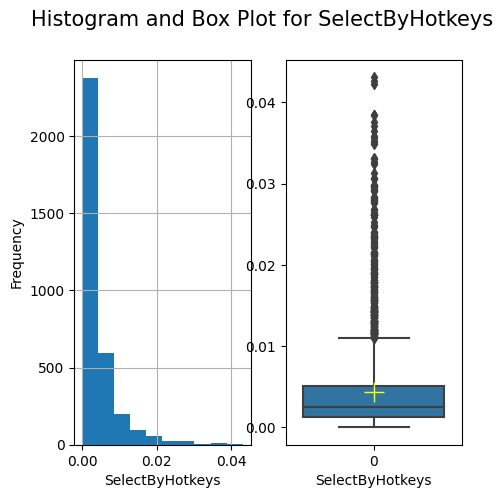

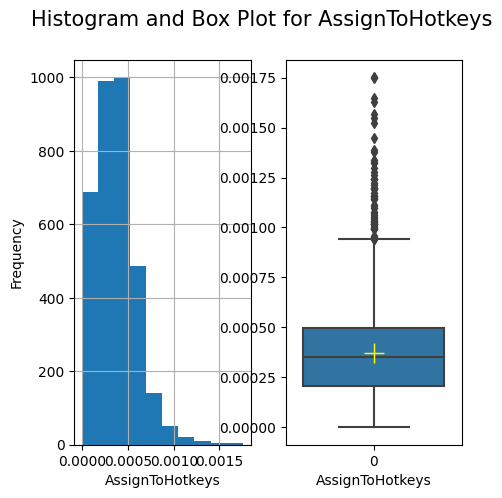

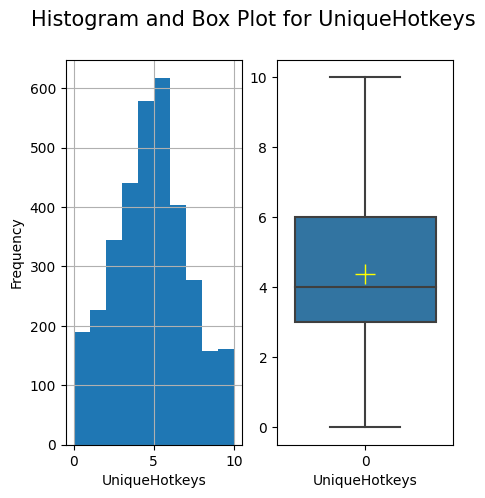

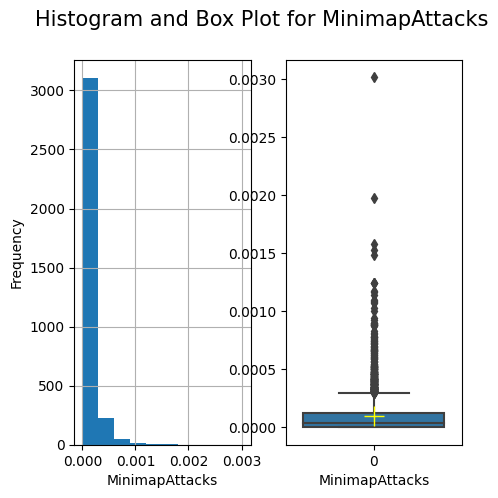

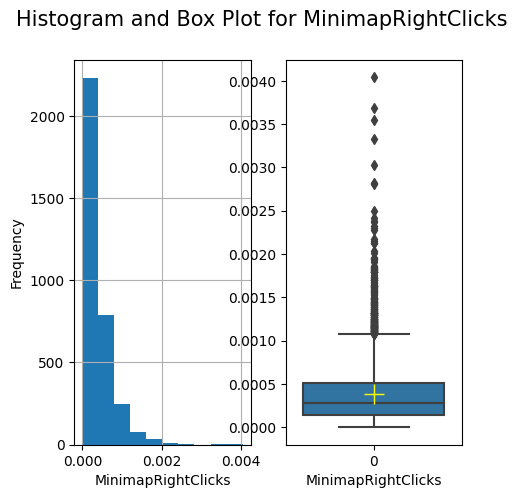

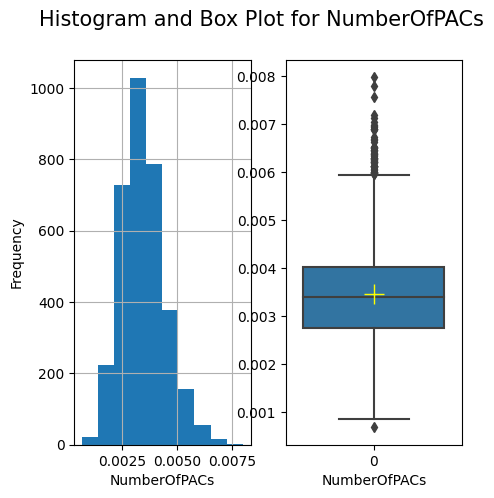

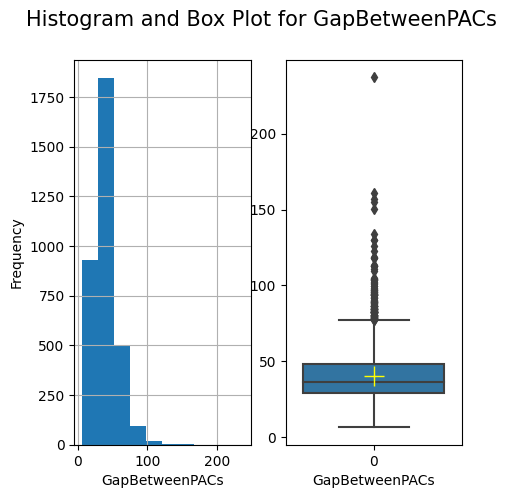

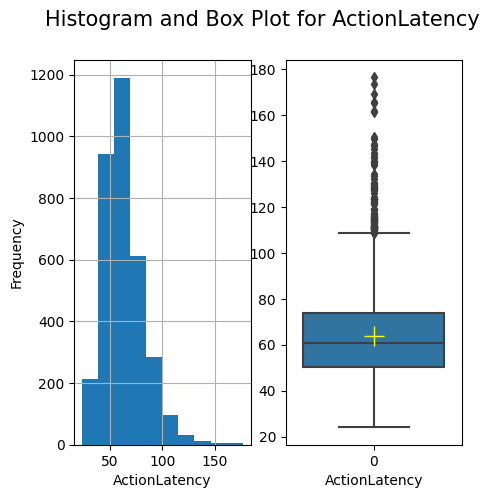

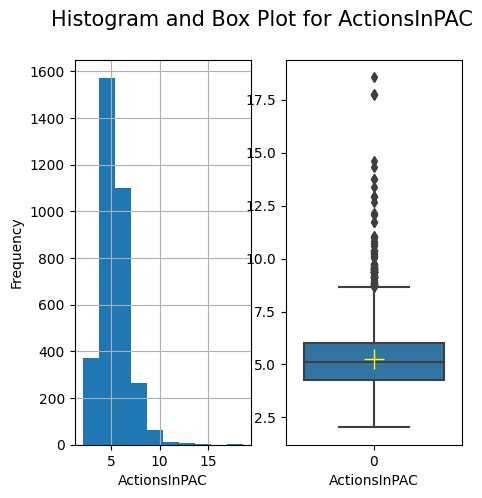

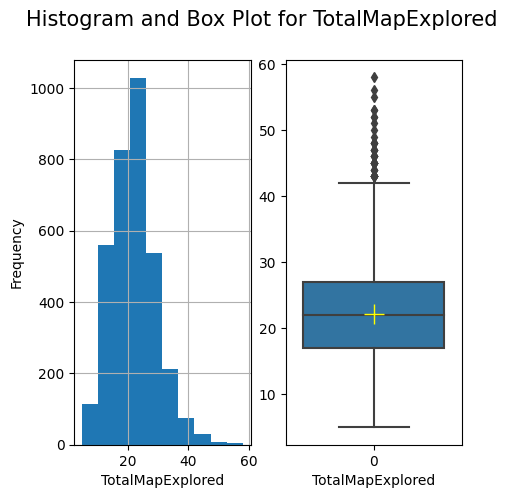

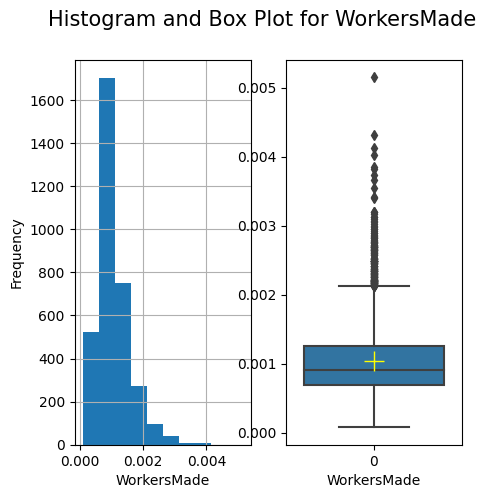

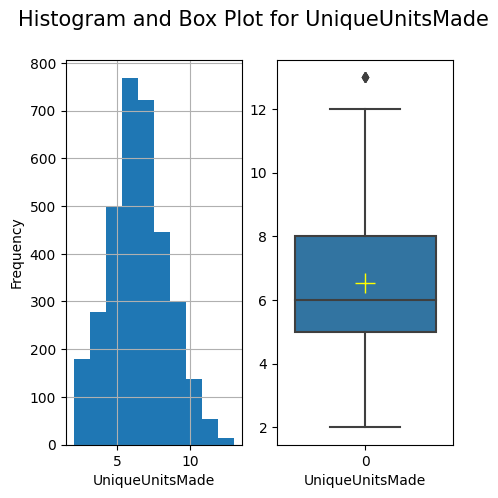

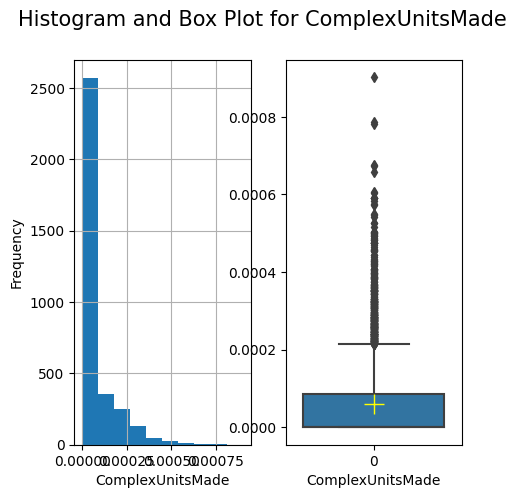

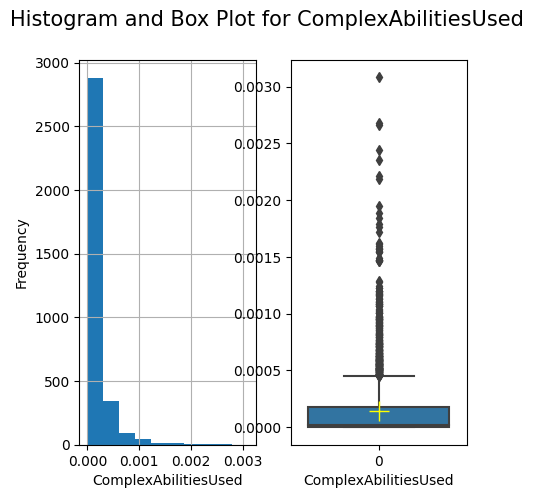

In [7]:
for i in final_data.columns:
    fig, axes = plt.subplots(1, 2,figsize=(5,5))
    fig.suptitle("Histogram and Box Plot for " + i , fontsize=15)
    final_data[i].hist(ax=axes[0])
    axes[0].set_xlabel(i)
    axes[0].set_ylabel('Frequency')
    sns.boxplot(final_data[i], ax=axes[1], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "yellow",
                       "markersize": "15"})
    axes[1].set_xlabel(i)
    plt.show()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,1.000000,-0.130445,0.240523,0.034319,0.662309,0.490599,0.531125,0.351213,0.312544,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.220676,0.295643,0.133508,0.148834,0.145733
Age,-0.130445,1.000000,-0.187043,-0.018229,-0.207465,-0.132238,-0.109263,0.012432,0.040127,-0.020705,-0.198012,0.115196,0.241952,-0.046741,-0.023218,-0.092701,0.025089,-0.079633,-0.065815
HoursPerWeek,0.240523,-0.187043,1.000000,0.028792,0.270447,0.232753,0.182963,0.085821,0.104193,0.060854,0.193807,-0.149032,-0.205147,0.098099,0.065021,0.050371,0.034613,0.054770,0.074908
TotalHours,0.034319,-0.018229,0.028792,1.000000,0.082993,0.091615,0.052231,0.014673,0.007862,0.012111,0.046781,-0.026233,-0.041977,0.012002,0.020418,0.014920,-0.003905,-0.008256,-0.005904
APM,0.662309,-0.207465,0.270447,0.082993,1.000000,0.840693,0.578416,0.361704,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.220749,0.349692,0.100844,0.136143,0.131587
SelectByHotkeys,0.490599,-0.132238,0.232753,0.091615,0.840693,1.000000,0.504526,0.302096,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.083481,0.141723,0.006121,0.044002,0.061037
AssignToHotkeys,0.531125,-0.109263,0.182963,0.052231,0.578416,0.504526,1.000000,0.420242,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.192928,0.183065,0.132829,0.144603,0.154410
UniqueHotkeys,0.351213,0.012432,0.085821,0.014673,0.361704,0.302096,0.420242,1.000000,0.180592,0.141576,0.372079,-0.242815,-0.323103,-0.016400,0.264650,0.108141,0.225030,0.110363,0.102453
MinimapAttacks,0.312544,0.040127,0.104193,0.007862,0.271021,0.197158,0.242196,0.180592,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.166392,0.077624,0.120824,0.040239,0.044528
MinimapRightClicks,0.233231,-0.020705,0.060854,0.012111,0.322179,0.143368,0.193043,0.141576,0.242269,1.000000,0.176137,-0.254466,-0.230660,0.307512,0.172592,0.206594,0.148699,0.091604,0.090650


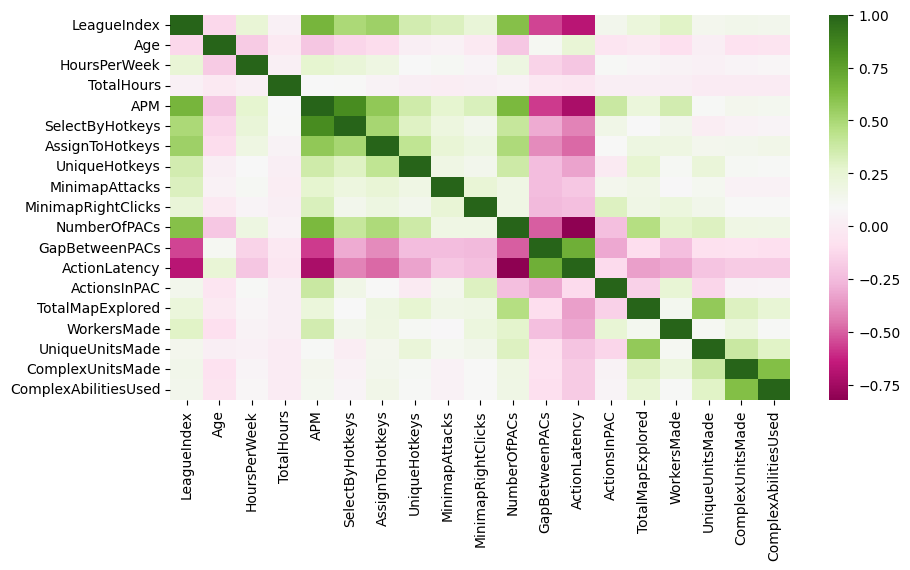

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(final_data.corr(),cmap="PiYG")
final_data.corr()

In [9]:
final_data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.631943,16.080025,1040.984300,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,4.177311,11.944110,17187.248258,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,16.000000,0.000000,-1743.409112,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### Now seeing relation of each individual variable with League Index which is our target variable

In [10]:
temp = list(final_data.columns)
temp.remove("LeagueIndex")
print(temp)

['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']


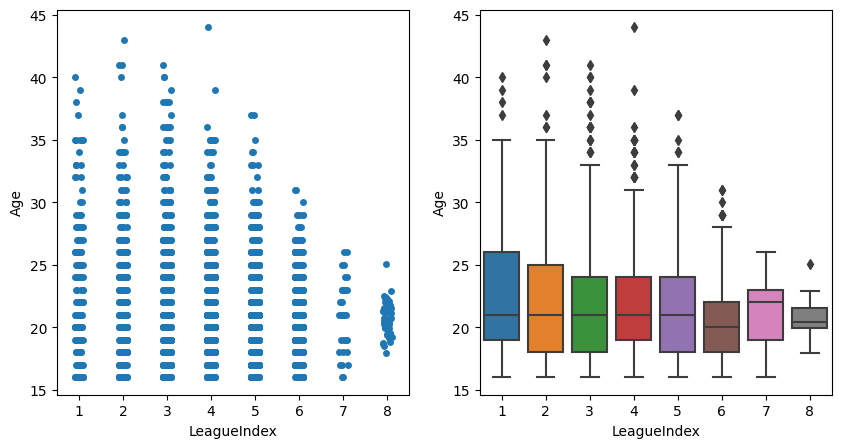

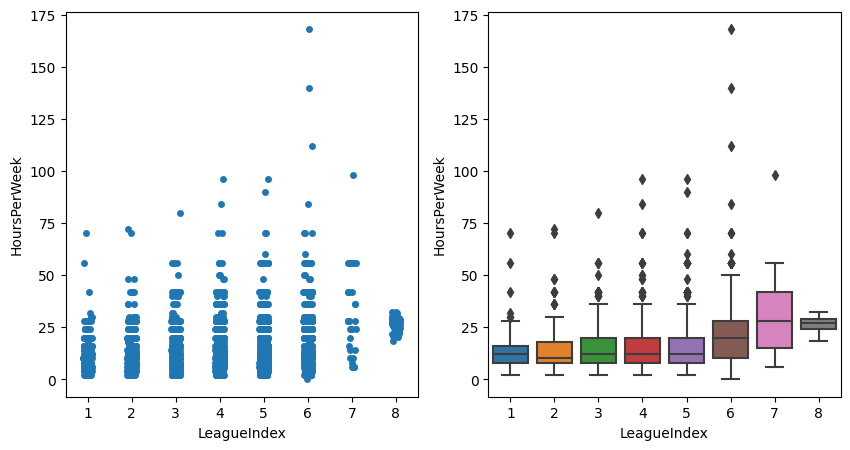

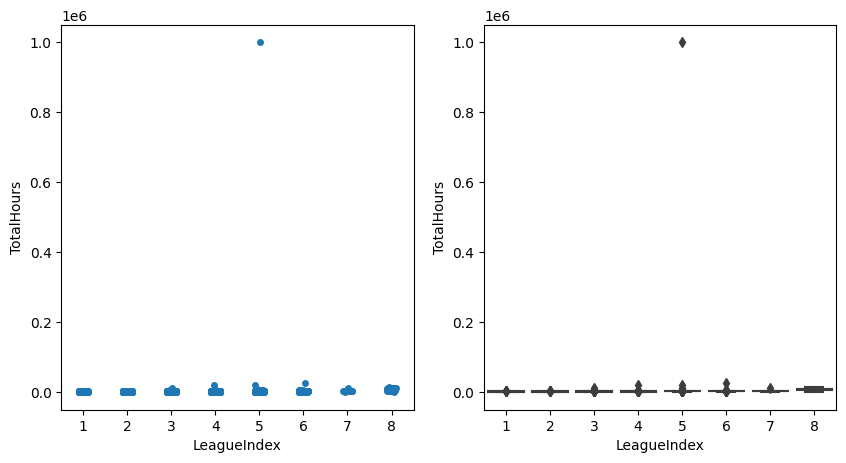

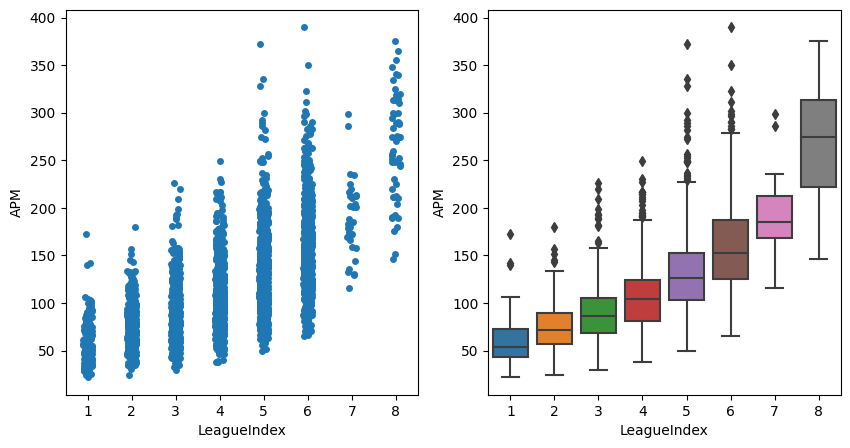

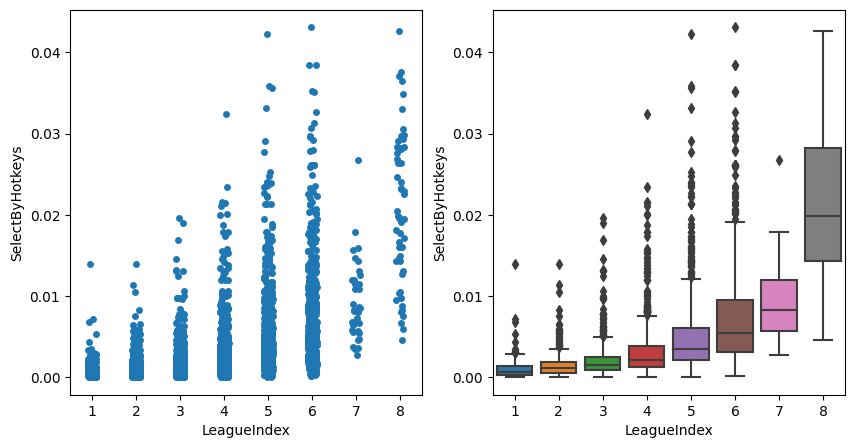

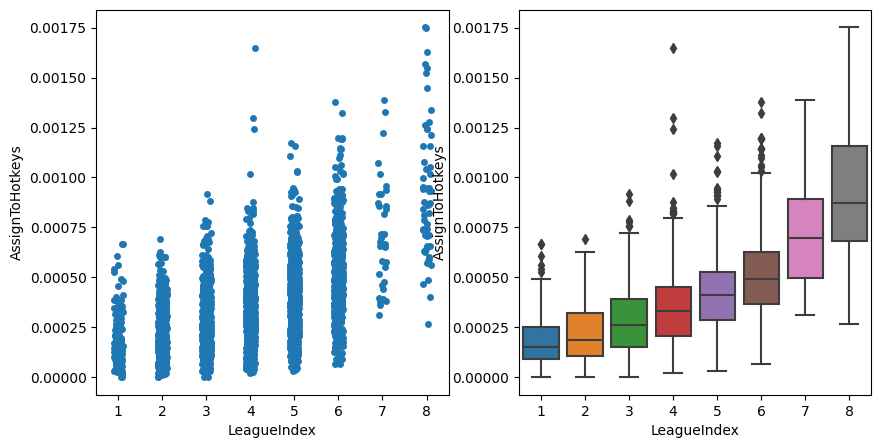

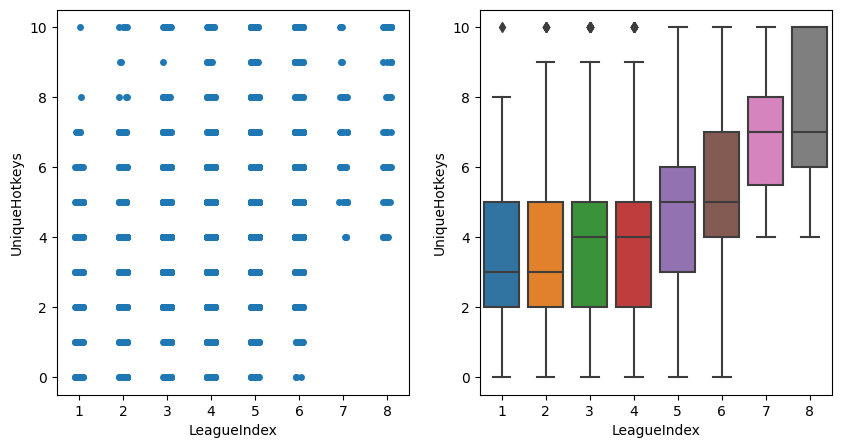

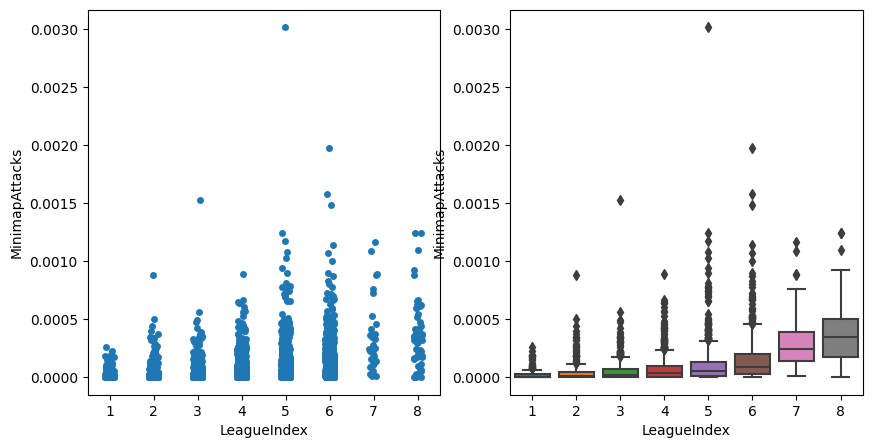

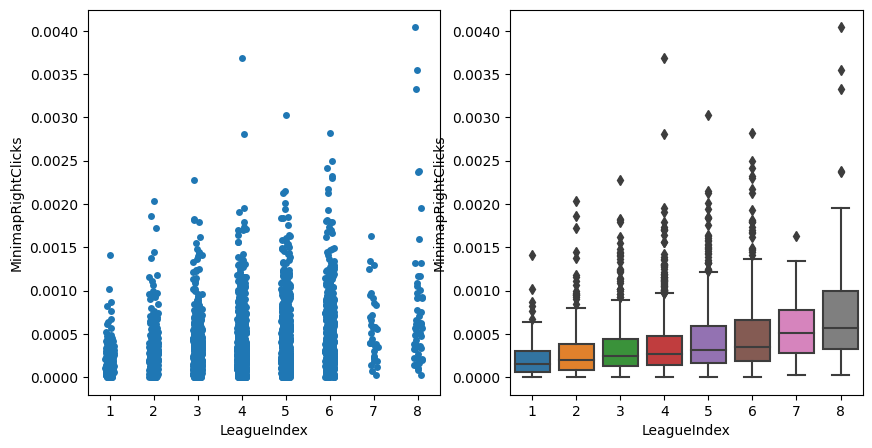

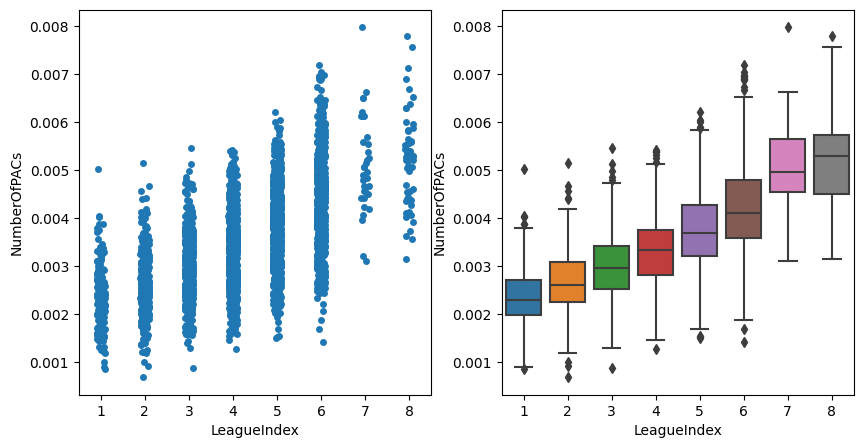

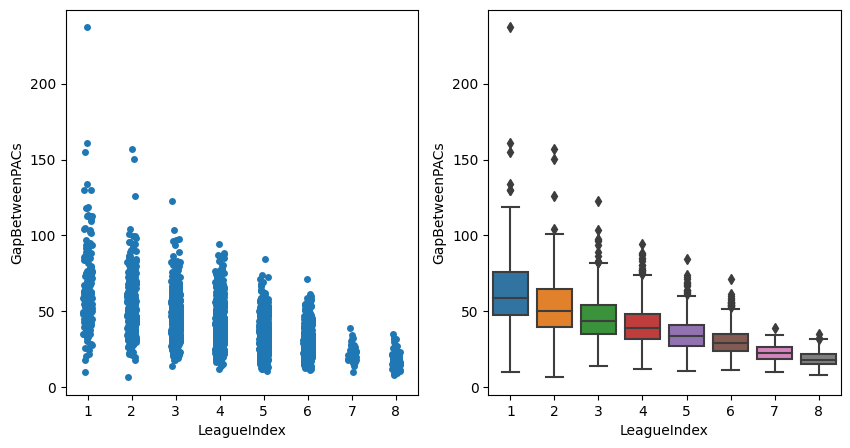

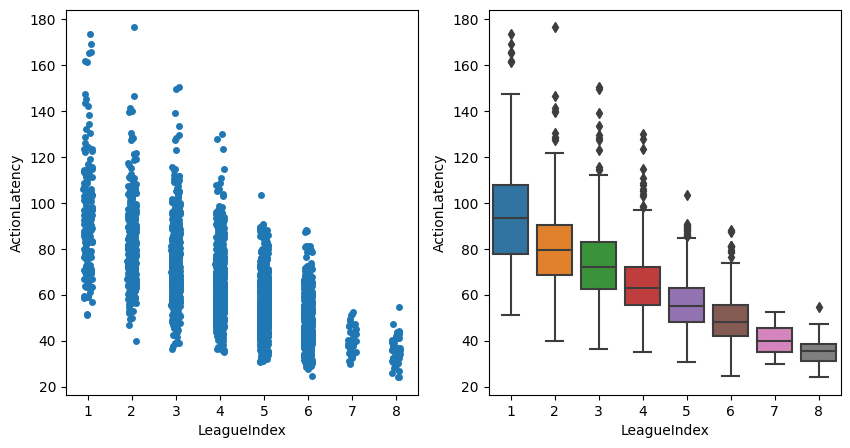

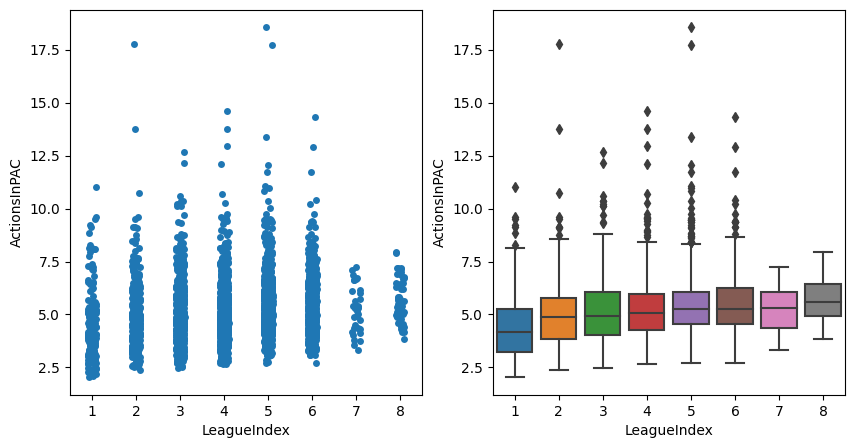

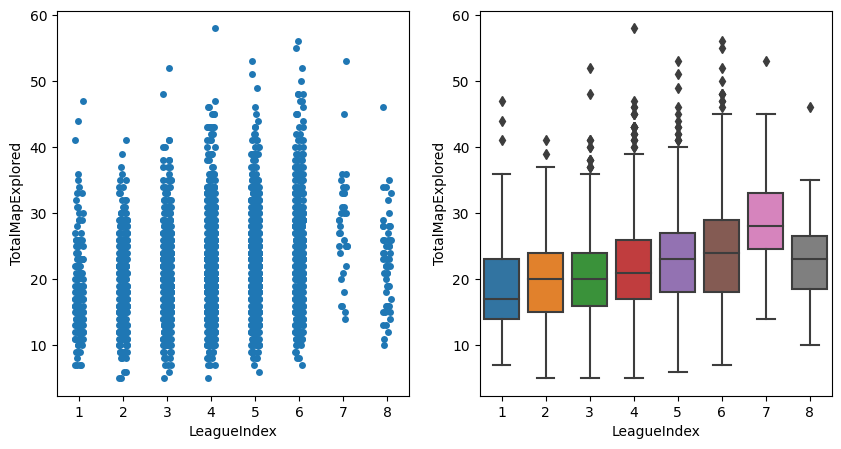

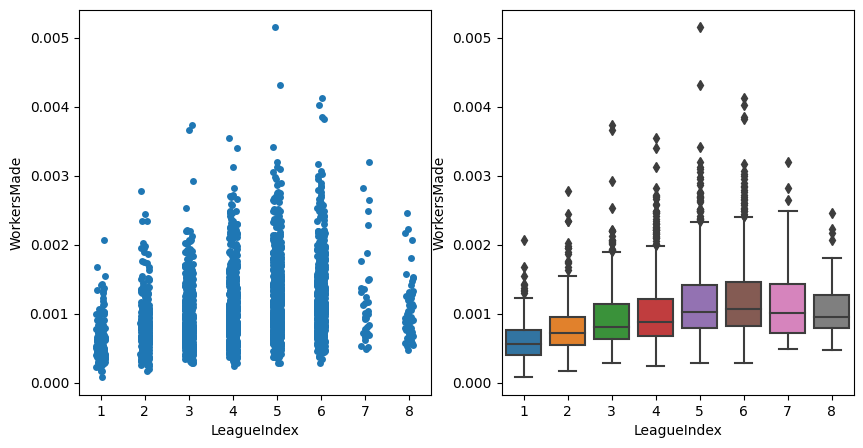

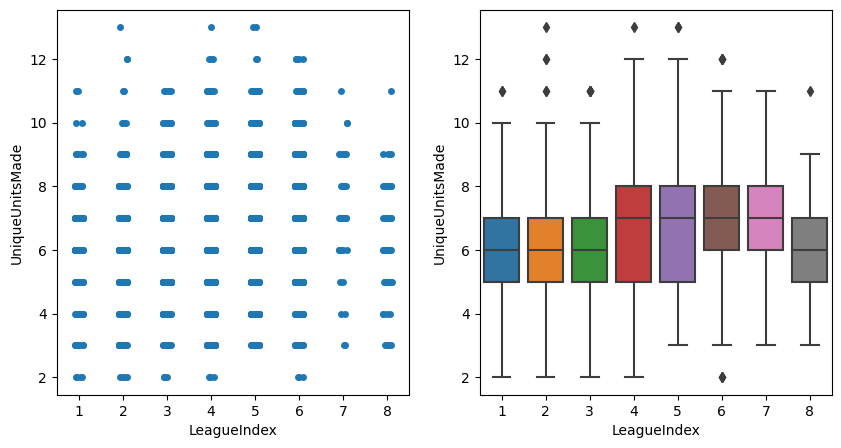

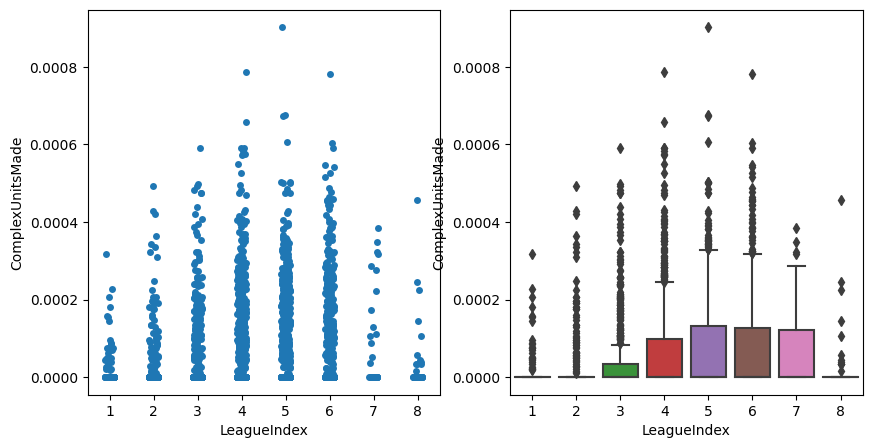

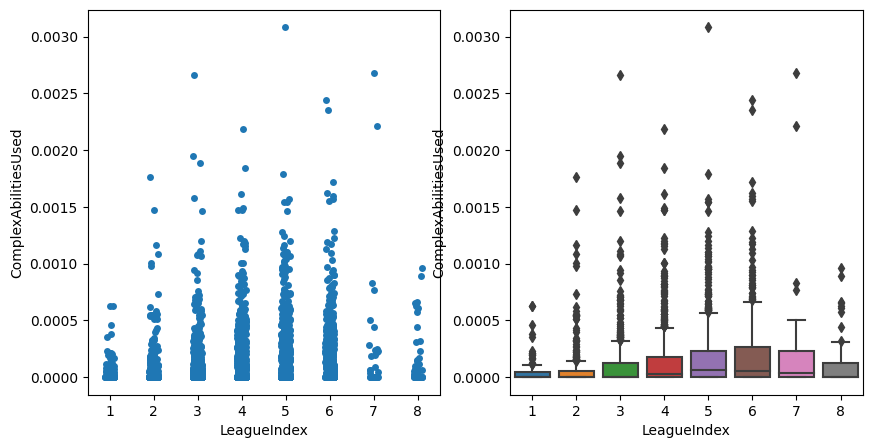

In [11]:
for i in temp:
    fig, axes = plt.subplots(1, 2,figsize=(10,5), sharex=True)
    sns.stripplot(x='LeagueIndex', y=i, data=final_data, ax= axes[0])
    sns.boxplot(data=final_data, x='LeagueIndex', y=i, ax= axes[1])

## Outlier Detection

#### In usual scenarios, 1.5 is taken as the multiplier for IQR but I have taken it as 5 to relax the threshold a little so that we don't exclude many rows

In [12]:
final_data.shape

(3395, 19)

In [13]:
for i in final_data.columns:
    Q1 = final_data[i].quantile(0.25)
    Q3 = final_data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 5*IQR
    upper = Q3 + 5*IQR
    upper_array = np.where(final_data[i]>upper)[0]
    lower_array = np.where(final_data[i]<lower)[0]
    final_data.drop(index=upper_array, inplace=True)
    final_data.drop(index=lower_array, inplace=True)
    final_data.reset_index(drop =True, inplace=True)

In [14]:
final_data.shape

(3171, 19)

## Model Building 

In [15]:
y = final_data['LeagueIndex']
X = final_data.drop('LeagueIndex', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
X_train.shape

(2536, 18)

### Scaling the Data so that it can be used while implementing any algorithm. There are alogithms where performance can be affected due to the scale of the predictor and hence it is always safe to scale the data

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train, columns = X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(data = X_test, columns = X.columns)

## Regression

####  In the first experiment, I try to take this as a regression problem. This makes more sense intuitively as we are trying to predict the rank of a player and hence the output should be continuous.

#### Ridge Regression

In [18]:
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10], cv=5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(r2_score(y_test,y_pred))

0.6127435831236938


#### Function for Training, tuning and Testing

In [19]:
params = { 
    'n_estimators': [10, 50, 100, 500,1000,2000],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3, 5, 10, 50, 100],
    'learning_rate': [0.001,0.01, 0.1,1],
    'solver' : ['lbfgs', 'saga'],
    'penalty' : ['none', 'l2'],
    'C' : [0.1, 1, 10],
    'subsample': np.arange(0.2, 1.0, 0.9)}

def train_tune_test(params, model, X_train, y_train, X_test, y_test, scoring, type_supervised = 'classification'):
    check = list(model.get_params().keys())
    final_params = {}
    for i in check:
        if i in params.keys():
            final_params[i] = params.get(i)
    grid = GridSearchCV(model, final_params, scoring= scoring, n_jobs=-1,  cv=5, verbose= False)
    grid.fit(X_train, y_train)
    print('Best Parameters:',grid.best_params_,end='\n\n')
    print('Best Score:',grid.best_score_)
    y_pred = grid.predict(X_test)
    print("Performance for ", model.__class__.__name__, "\n")
    if type_supervised == 'regression':
        print(r2_score(y_test,y_pred))
    else :
        print(classification_report(y_test, y_pred))
    return grid

#### Random Forest Regressor


In [20]:
model = RandomForestRegressor()
best_rf= train_tune_test(params, model, X_train, y_train, X_test, y_test, 'neg_mean_squared_error','regression')

Best Parameters: {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 2000}

Best Score: -0.8881152504546584
Performance for  RandomForestRegressor 

0.6208878837279749


#### XGBoost Regressor

In [21]:
model = xgb.XGBRegressor()
best_xgb = train_tune_test(params, model, X_train, y_train, X_test, y_test, 'neg_mean_squared_error', 'regression')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.2}

Best Score: -0.8649438948407162
Performance for  XGBRegressor 

0.6430249439270522


## Interpreting Models

#### This provides an insight on which variables played a major role in the construction of trees in XGBoost while training the model

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

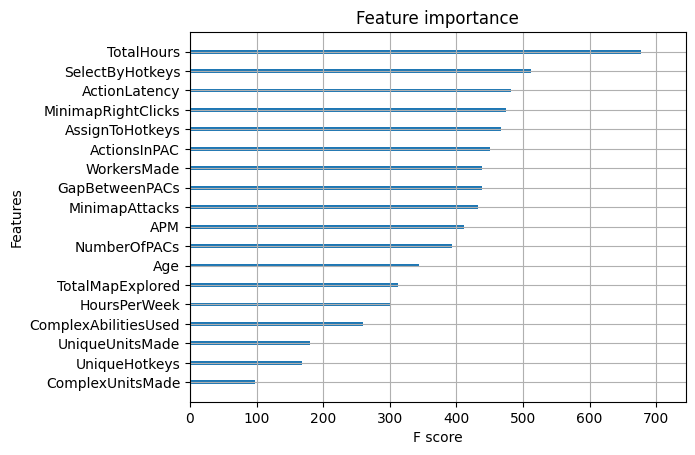

In [22]:
plot_importance(best_xgb.best_estimator_, max_num_features = X_train.shape[1], show_values = False)

#### Shap values reveal the features that have the largest contribution in model prediction. This can be checked on a global level as well as on a local level where we can drill down on a particular row to see which variables helped in making the decision

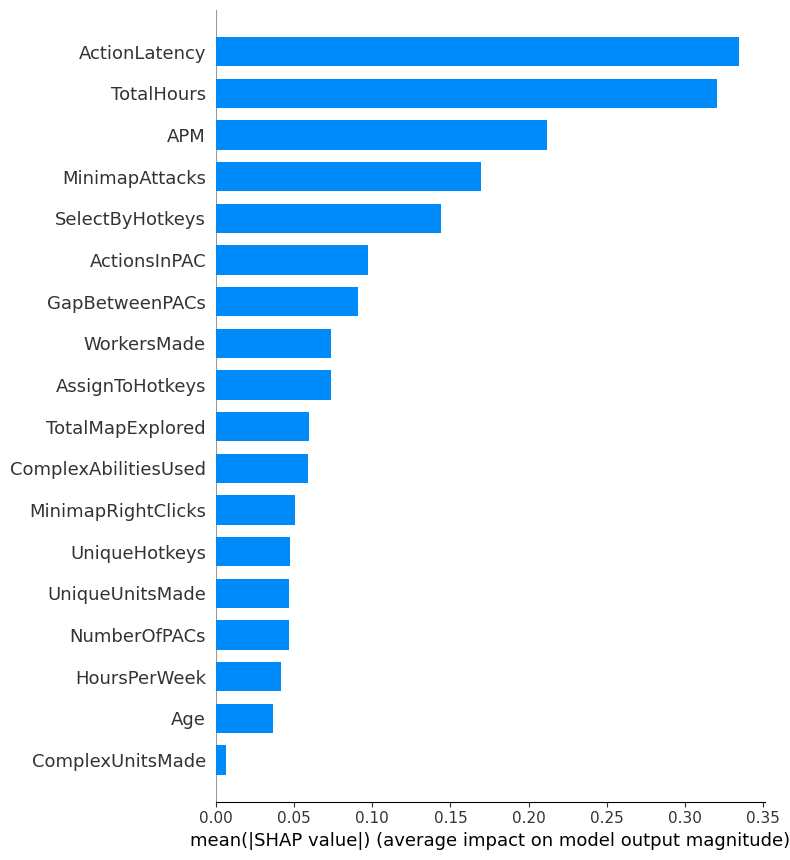

In [23]:
explainer = shap.TreeExplainer(best_xgb.best_estimator_)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")

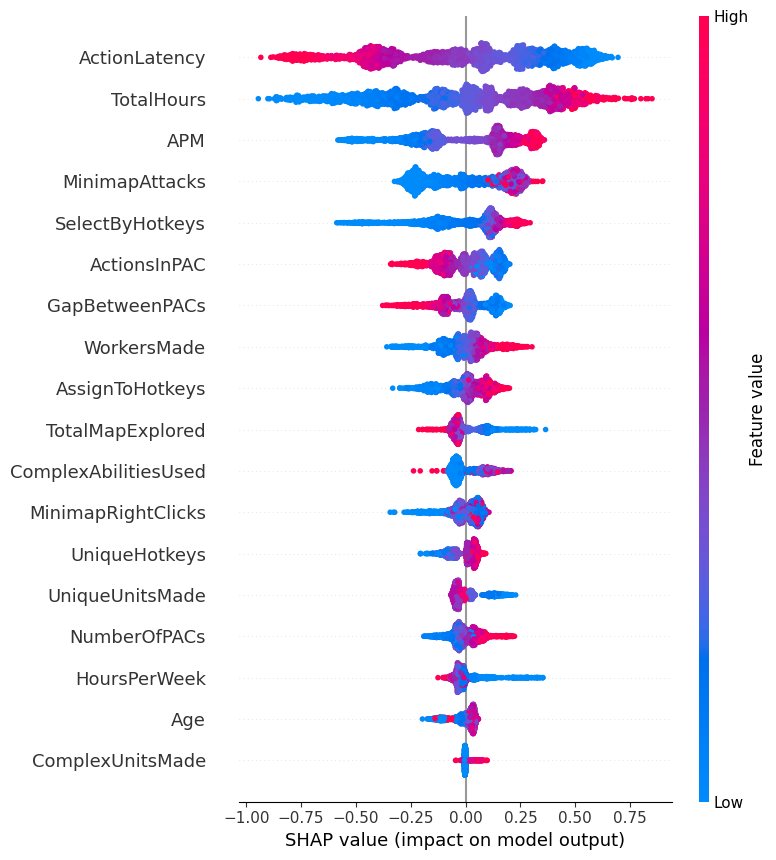

In [24]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

In [25]:
i = 1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], feature_names = X_test.columns)

## Classification

#### Now exploring as a classification problem as there are only cardinality of LeagueIndex columns is 8. So this can also be considered as a case of Classification Problem

### Logistic

In [26]:
model = LogisticRegression(multi_class='multinomial')
best_lr = train_tune_test(params, model, X_train, y_train, X_test, y_test,'accuracy')

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Best Score: 0.4144263771762257
Performance for  LogisticRegression 

              precision    recall  f1-score   support

           1       0.65      0.39      0.49        33
           2       0.36      0.28      0.31        58
           3       0.42      0.29      0.34       103
           4       0.42      0.57      0.49       159
           5       0.41      0.42      0.42       156
           6       0.54      0.57      0.55       116
           7       0.00      0.00      0.00         6
           8       1.00      0.25      0.40         4

    accuracy                           0.44       635
   macro avg       0.47      0.35      0.37       635
weighted avg       0.44      0.44      0.44       635



In [27]:
model = RandomForestClassifier()
best_rf = train_tune_test(params, model, X_train, y_train, X_test, y_test,'accuracy')

Best Parameters: {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 2000}

Best Score: 0.41916864681855603
Performance for  RandomForestClassifier 

              precision    recall  f1-score   support

           1       0.59      0.30      0.40        33
           2       0.32      0.22      0.26        58
           3       0.31      0.25      0.28       103
           4       0.38      0.51      0.44       159
           5       0.41      0.42      0.41       156
           6       0.56      0.59      0.58       116
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         4

    accuracy                           0.42       635
   macro avg       0.32      0.29      0.30       635
weighted avg       0.41      0.42      0.41       635



In [28]:
model = xgb.XGBClassifier()
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.transform(y_test)
best_xg = train_tune_test(params, model, X_train, y_train_xgb, X_test, y_test_xgb,'accuracy')

Best Parameters: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.2}

Best Score: 0.4112860892388451
Performance for  XGBClassifier 

              precision    recall  f1-score   support

           0       0.68      0.39      0.50        33
           1       0.35      0.22      0.27        58
           2       0.32      0.26      0.29       103
           3       0.40      0.51      0.45       159
           4       0.38      0.42      0.40       156
           5       0.55      0.59      0.57       116
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4

    accuracy                           0.42       635
   macro avg       0.34      0.30      0.31       635
weighted avg       0.42      0.42      0.41       635



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

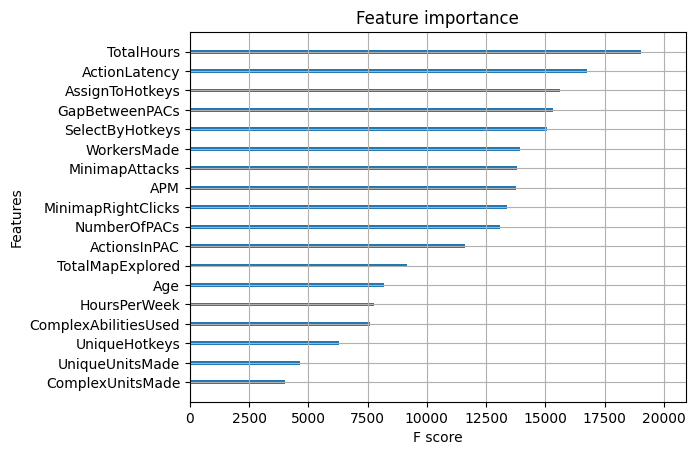

In [31]:
plot_importance(best_xg.best_estimator_, max_num_features = X_train.shape[1], show_values = False)

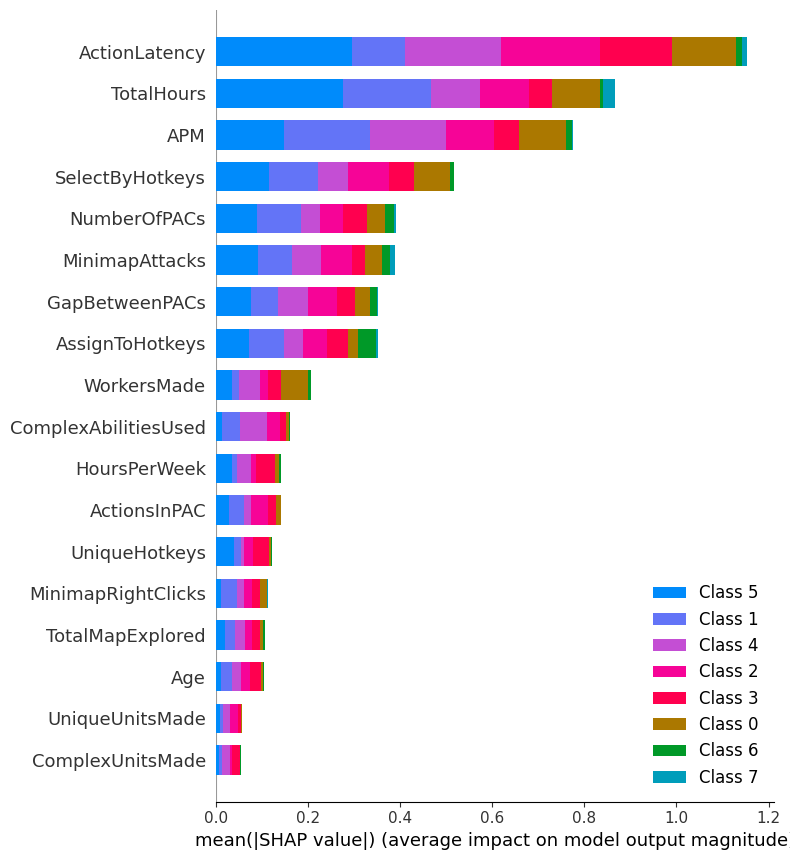

In [32]:
explainer = shap.TreeExplainer(best_xg.best_estimator_)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")